In [3]:
import sys
import os
sys.path.insert(1, 'C:\\Users\\visha\\OneDrive\\Documents\\GitRepos\\PeakSmoother\\scripts')
import GPR
import matplotlib.pyplot as plt
import pandas as pd

import scienceplots
plt.style.use(['science','no-latex'])

In [2]:
data = pd.read_csv("../sample_data/2900.csv")

In [3]:
rt, smoothed_intensity, sigma = GPR.GPR(data['RT'].values, data['Intensity'].values)

c:\Users\visha\anaconda3\envs\myenv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\visha\anaconda3\envs\myenv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd

# Ensure rt, smoothed_intensity, and sigma are 1-dimensional arrays
rt = np.array(rt).flatten()
smoothed_intensity = np.array(smoothed_intensity).flatten()
sigma = np.array(sigma).flatten()

# Ensure they all have the same length
if len(rt) == len(smoothed_intensity) == len(sigma):
    rt_array = np.linspace(min(rt), max(rt), len(smoothed_intensity))
    smoothed_intensity_df = pd.DataFrame({'RT': rt_array, 'Intensity': smoothed_intensity, 'Sigma': sigma})
else:
    raise ValueError("rt, smoothed_intensity, and sigma must have the same length")

## Moving Average smoothing with window size 5

data["MA"] = data["Intensity"].rolling(window=5).mean()

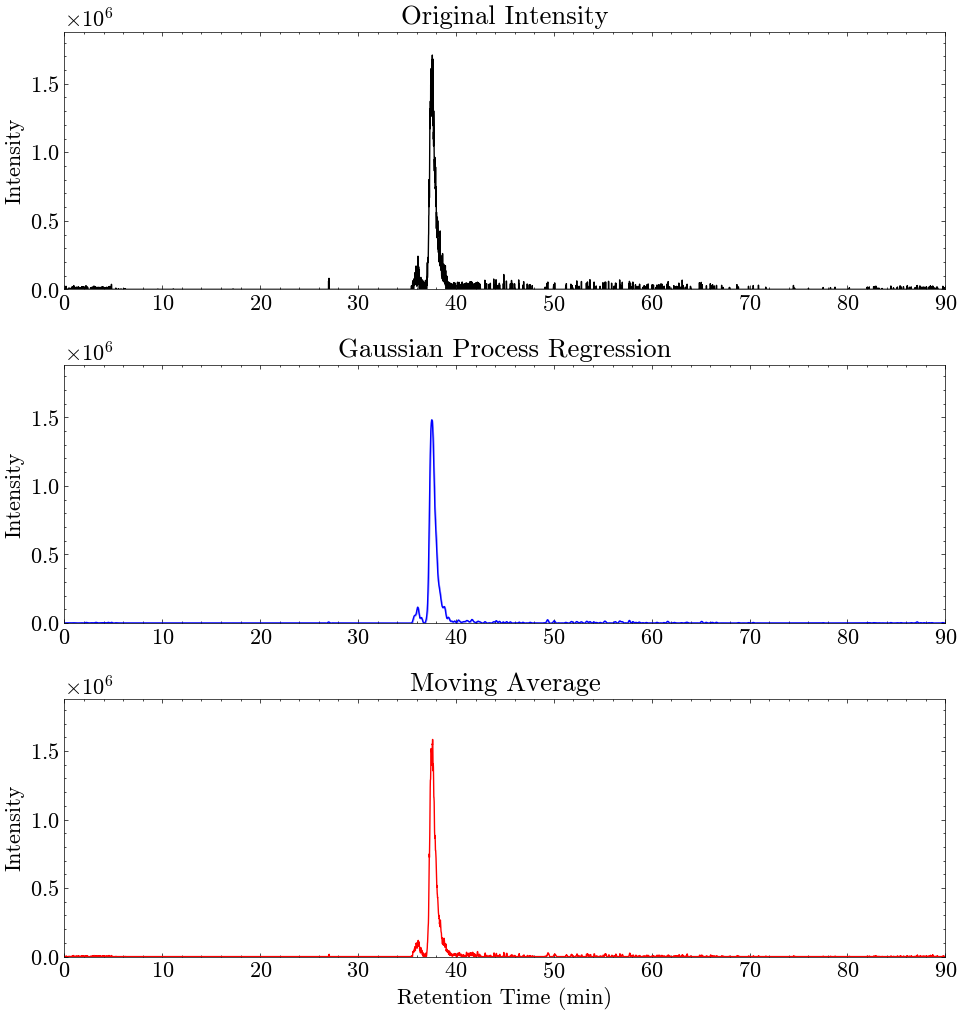

<Figure size 350x262.5 with 0 Axes>

In [20]:
## Plot three subplots in one column 
plt.rcParams.update({'font.size': 16})
plt.style.use(['science','no-latex'])
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.plot(data["RT"], data["Intensity"], label="Original Data", color="black")
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.title("Original Intensity")
plt.tight_layout()

plt.subplot(3, 1, 2)
plt.plot(rt, smoothed_intensity, label="GPR", color="blue")
plt.fill_between(rt, smoothed_intensity - sigma, smoothed_intensity + sigma, color='blue', alpha=0.3)
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.title("Gaussian Process Regression")
plt.tight_layout()

plt.subplot(3, 1, 3)
plt.plot(data["RT"], data["MA"], label="Moving Average", color="red")
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.xlabel("Retention Time (min)")
plt.title("Moving Average")
plt.savefig("../figures/2900_GPR.png")
plt.show()
plt.tight_layout()

c:\Users\visha\anaconda3\envs\myenv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\visha\anaconda3\envs\myenv\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\visha\anaconda3\envs\myenv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0.5, 1.0, 'Moving Average')

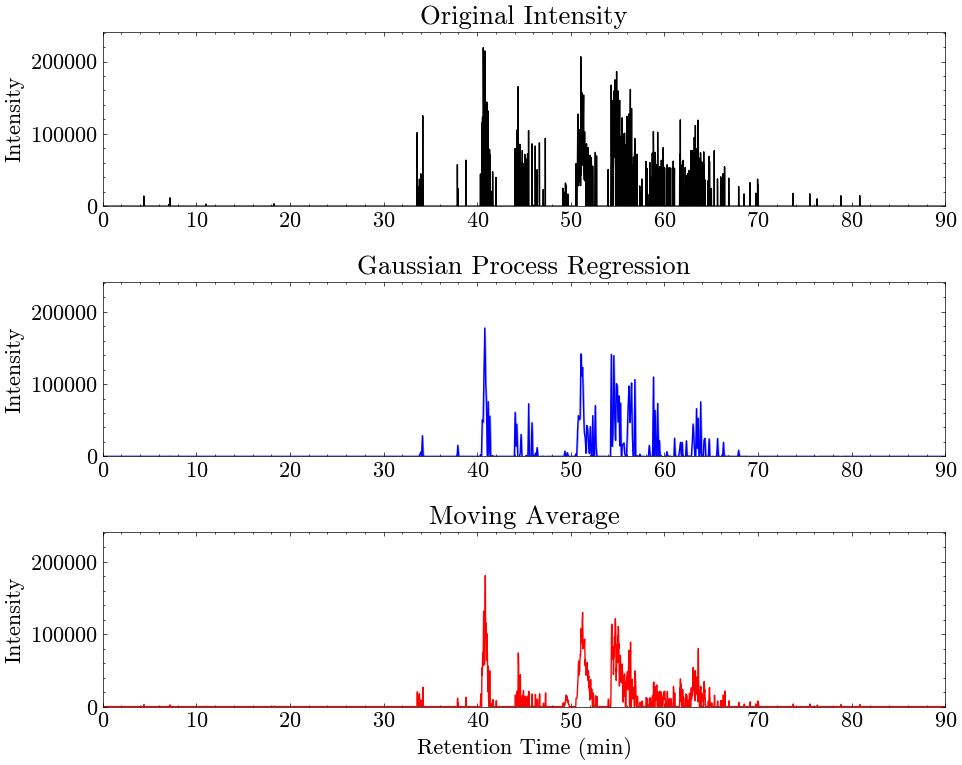

In [5]:
### 4502

data = pd.read_csv("../sample_data/4502.csv")

rt, smoothed_intensity, sigma = GPR.GPR(data['RT'].values, data['Intensity'].values, num_pred_points = 1000)

import numpy as np
import pandas as pd

# Ensure rt, smoothed_intensity, and sigma are 1-dimensional arrays
rt = np.array(rt).flatten()
smoothed_intensity = np.array(smoothed_intensity).flatten()
sigma = np.array(sigma).flatten()

# Ensure they all have the same length
if len(rt) == len(smoothed_intensity) == len(sigma):
    rt_array = np.linspace(min(rt), max(rt), len(smoothed_intensity))
    smoothed_intensity_df = pd.DataFrame({'RT': rt_array, 'Intensity': smoothed_intensity, 'Sigma': sigma})
else:
    raise ValueError("rt, smoothed_intensity, and sigma must have the same length")

## Moving Average smoothing with window size 5

data["MA"] = data["Intensity"].rolling(window=5).mean()


## Moving average for gaussian process regression
smoothed_intensity_df["MA"] = smoothed_intensity_df["Intensity"].rolling(window=5).mean()

## Plot three subplots in one column
plt.rcParams.update({'font.size': 16})
plt.style.use(['science','no-latex'])
plt.figure(figsize=(10, 10))

plt.subplot(4, 1, 1)
plt.plot(data["RT"], data["Intensity"], label="Original Data", color="black")
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.title("Original Intensity")
plt.tight_layout()

plt.subplot(4, 1, 2)
plt.plot(rt, smoothed_intensity, label="GPR", color="blue")
plt.fill_between(rt, smoothed_intensity - sigma, smoothed_intensity + sigma, color='blue', alpha=0.3)
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.title("Gaussian Process Regression")
plt.tight_layout()

plt.subplot(4, 1, 3)
plt.plot(data["RT"], data["MA"], label="Moving Average", color="red")
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.xlabel("Retention Time (min)")
plt.title("Moving Average")



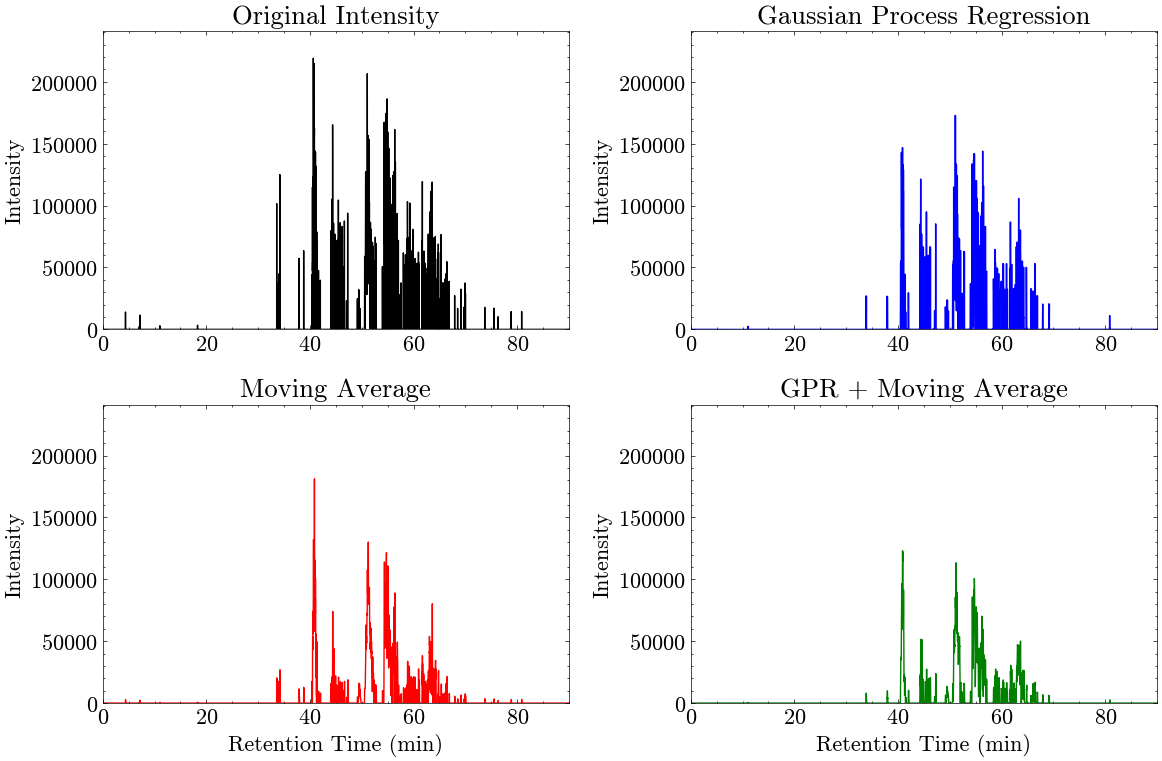

In [30]:

# Ensure they all have the same length
if len(rt) == len(smoothed_intensity) == len(sigma):
    rt_array = np.linspace(min(rt), max(rt), len(smoothed_intensity))
    smoothed_intensity_df = pd.DataFrame({'RT': rt_array, 'Intensity': smoothed_intensity, 'Sigma': sigma})
else:
    raise ValueError("rt, smoothed_intensity, and sigma must have the same length")

## Moving Average smoothing with window size 5

data["MA"] = data["Intensity"].rolling(window=5).mean()


## Moving average for gaussian process regression
smoothed_intensity_df["MA"] = smoothed_intensity_df["Intensity"].rolling(window=5).mean()

## Plot three subplots in one column
plt.rcParams.update({'font.size': 16})
plt.style.use(['science','no-latex'])
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(data["RT"], data["Intensity"], label="Original Data", color="black")
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.title("Original Intensity")
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.plot(rt, smoothed_intensity, label="GPR", color="blue")
plt.fill_between(rt, smoothed_intensity - sigma, smoothed_intensity + sigma, color='blue', alpha=0.3)
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.title("Gaussian Process Regression")
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.plot(data["RT"], data["MA"], label="Moving Average", color="red")
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.xlabel("Retention Time (min)")
plt.title("Moving Average")

plt.subplot(2, 2, 4)
plt.plot(smoothed_intensity_df["RT"], smoothed_intensity_df["MA"], label="GPR + MA", color="green")
plt.xlim(0, 90)
plt.ylabel("Intensity")
plt.ylim(0, data["Intensity"].max() * 1.1)
plt.xlabel("Retention Time (min)")
plt.title("GPR + Moving Average")
plt.tight_layout()
plt.savefig("../figures/4502_GPR_MA.png")
plt.show()